In [44]:
import glob
import os
from pathlib import Path
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [27]:
def get_latest(directory, pattern = "*"):
    fs = []
    for f in directory.glob(pattern):
        fs.append(max(f.glob("*.out"), key=os.path.getctime))
    return fs

def get_time_and_mem_from_file(contents: str):
    for line in map(str.strip, contents.splitlines()):
        if line.startswith("Max Memory"):
            m = re.search(r"\d+\.?\d*", line)
            if not m:
                mb = None
            else:
                mb = float(m.group())
        elif line.startswith("CPU time"):
            m = re.search(r"\d+\.?\d*", line)
            if not m:
                sec = None
            else:
                sec = float(m.group())
    return sec, mb

In [3]:
fs = list(Path("../data/variant_call_logs/discover_denovo_variants/").glob("*sparse*"))

In [9]:
fs = get_latest(Path("../data/variant_call_logs/discover_denovo_variants/"), "*sparse*")

In [30]:
data = []
for f in fs:
    contents = f.read_text()
    if "Successfully completed" not in contents:
        continue
    sec, mb = get_time_and_mem_from_file(contents)
    job = f.parts[-3]
    sample = f.parts[-2].split("=")[-1]
    tool = "sparse"
    data.append((job, sample, tool, sec, mb))

In [31]:
len(data)

150

In [33]:
tool = "dense"
fs = get_latest(Path("../data/variant_call_logs/discover_denovo_variants/"), f"*{tool}*")
for f in fs:
    contents = f.read_text()
    if "Successfully completed" not in contents:
        continue
    sec, mb = get_time_and_mem_from_file(contents)
    job = f.parts[-3]
    sample = f.parts[-2].split("=")[-1]
    data.append((job, sample, tool, sec, mb))

In [34]:
len(data)

299

In [35]:
for tool in ["sparse", "dense"]:
    fs = get_latest(Path("../data/variant_call_logs/index_single_sample_updated_prg/"), f"*{tool}*")
    for f in fs:
        contents = f.read_text()
        if "Successfully completed" not in contents:
            continue
        sec, mb = get_time_and_mem_from_file(contents)
        job = f.parts[-3]
        sample = f.parts[-2].split("=")[-1]
        data.append((job, sample, tool, sec, mb))

In [36]:
for tool in ["sparse", "dense"]:
    fs = get_latest(Path("../data/variant_call_logs/make_single_sample_local_prgs"), f"*{tool}*")
    for f in fs:
        contents = f.read_text()
        if "Successfully completed" not in contents:
            continue
        sec, mb = get_time_and_mem_from_file(contents)
        job = f.parts[-3]
        sample = f.parts[-2].split("=")[-1]
        data.append((job, sample, tool, sec, mb))

In [37]:
for tool in ["sparse", "dense"]:
    fs = get_latest(Path("../data/variant_call_logs/single_sample_genotype/"), f"*{tool}*")
    for f in fs:
        contents = f.read_text()
        if "Successfully completed" not in contents:
            continue
        sec, mb = get_time_and_mem_from_file(contents)
        job = f.parts[-3]
        sample = f.parts[-2].split("=")[-1]
        data.append((job, sample, tool, sec, mb))

In [38]:
for tool in ["sparse", "dense"]:
    fs = get_latest(Path("../data/variant_call_logs/update_msas_for_single_sample/"), f"*{tool}*")
    for f in fs:
        contents = f.read_text()
        if "Successfully completed" not in contents:
            continue
        sec, mb = get_time_and_mem_from_file(contents)
        job = f.parts[-3]
        sample = f.parts[-2].split("=")[-1]
        data.append((job, sample, tool, sec, mb))

In [39]:
for tool in ["bcftools"]:
    fs = get_latest(Path("../data/variant_call_logs/pileup_nanopore/"))
    for f in fs:
        contents = f.read_text()
        if "Successfully completed" not in contents:
            continue
        sec, mb = get_time_and_mem_from_file(contents)
        job = f.parts[-3]
        sample = f.parts[-2].split("=")[-1]
        data.append((job, sample, tool, sec, mb))

In [43]:
df = pd.DataFrame(data, columns=["job", "sample", "tool", "time", "memory"])

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

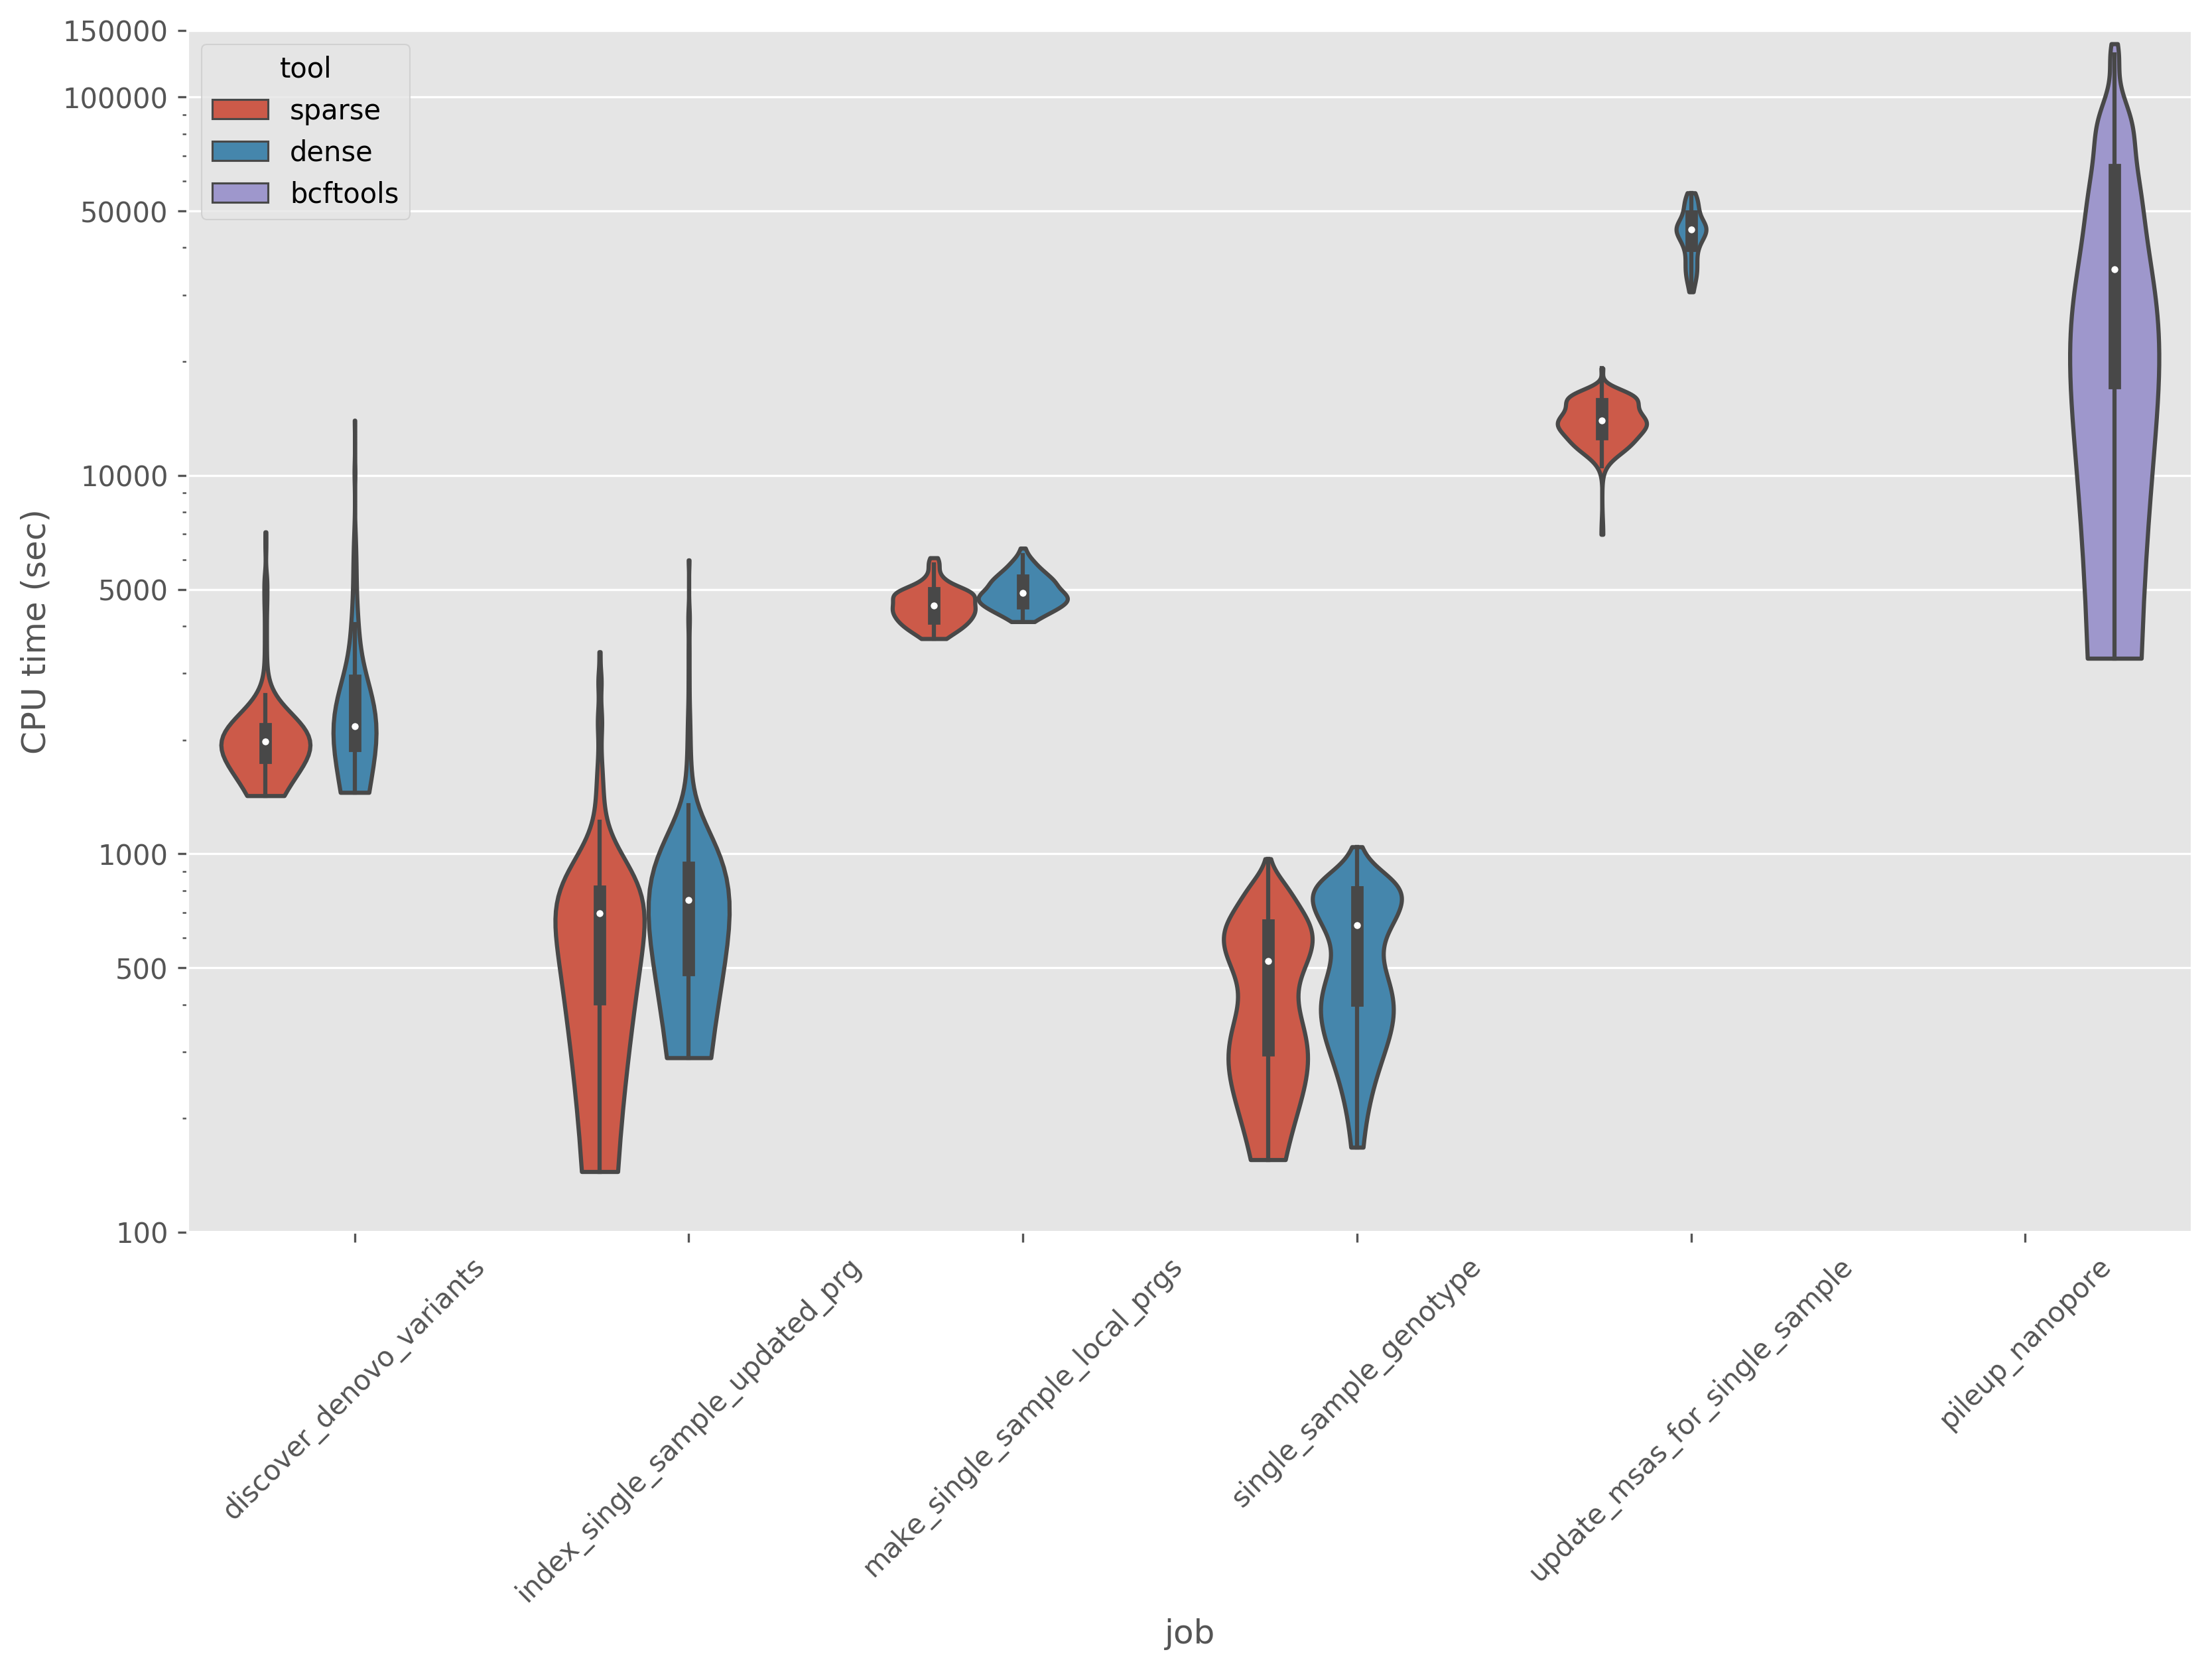

In [73]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
x = "job"
y = "time"
hue = "tool"
sns.violinplot(data=df, x=x, y=y, hue=hue, ax=ax, cut=0)
# sns.stripplot(data=df, x=x, y=y, hue=hue, ax=ax, dodge=True)
ax.set(yscale="log")
log_ticks = [100, 500, 1_000, 5_000, 10_000, 50_000, 100_000, 150_000]
ylim = (log_ticks[0], log_ticks[-1])
ax.set(yticks=log_ticks, ylim=ylim)
ax.set(xlabel=x, ylabel="CPU time (sec)")
_ = ax.set_yticklabels(log_ticks)
plt.xticks(rotation=45)

In [74]:
fig.savefig("cpu_time.png")

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

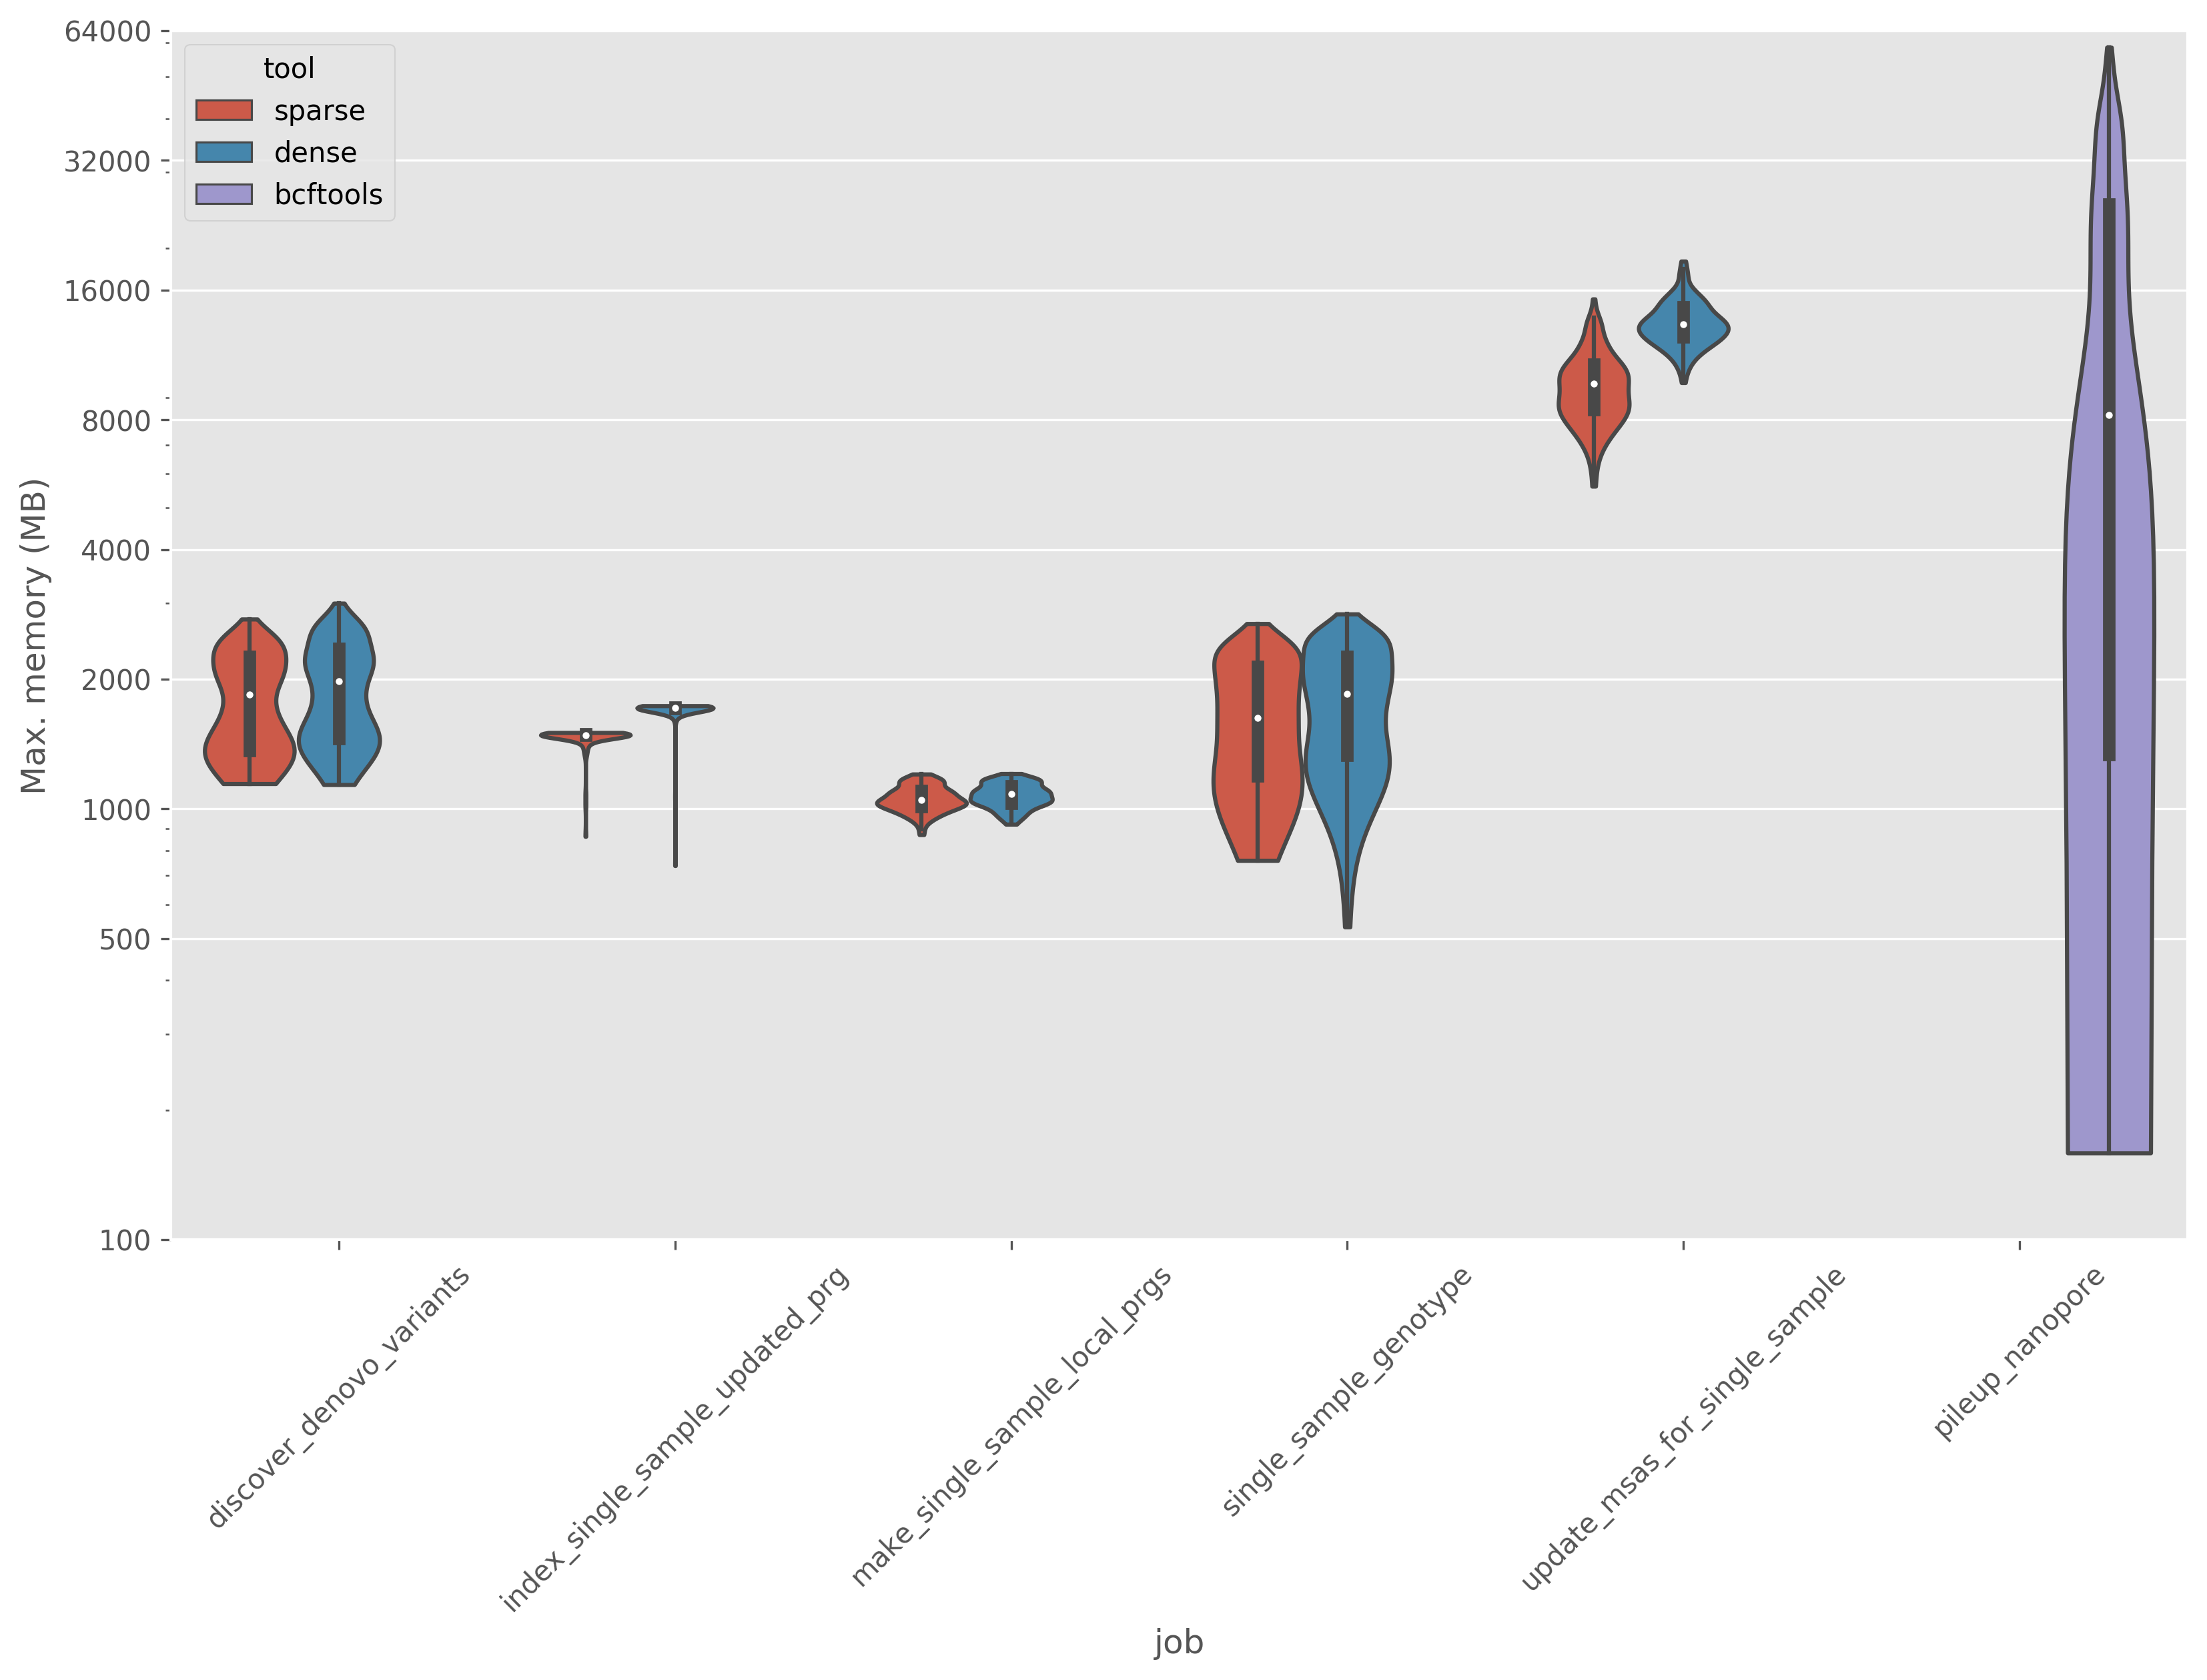

In [69]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
x = "job"
y = "memory"
hue = "tool"
sns.violinplot(data=df, x=x, y=y, hue=hue, ax=ax, cut=0)
# sns.stripplot(data=df, x=x, y=y, hue=hue, ax=ax, dodge=True)
ax.set(yscale="log")
log_ticks = [100, 500, 1_000, 2_000, 4_000, 8_000, 16_000, 32_000, 64_000]
ylim = (log_ticks[0], log_ticks[-1])
ax.set(yticks=log_ticks, ylim=ylim)
ax.set(xlabel=x, ylabel="Max. memory (MB)")
_ = ax.set_yticklabels(log_ticks)
plt.xticks(rotation=45)

In [70]:
fig.savefig("max_mem.png")

In [62]:
df.groupby(["job", "tool"]).describe()

time                              \
                                          count          mean           std   
job                             tool                                          
discover_denovo_variants        dense     149.0   2774.574698   1705.011854   
                                sparse    150.0   2186.472067    870.988511   
index_single_sample_updated_prg dense     150.0    873.796000    720.064366   
                                sparse    146.0    757.057945    551.747534   
make_single_sample_local_prgs   dense     147.0   4990.674150    511.854877   
                                sparse    150.0   4588.704000    512.651824   
pileup_nanopore                 bcftools  147.0  44400.043946  32290.760038   
single_sample_genotype          dense     150.0    607.070200    211.027899   
                                sparse    150.0    499.586800    198.538528   
update_msas_for_single_sample   dense     133.0  44378.145865   6232.777591   
                                sparse    150.0  14096.935200   1737.844896   

                                                                           \
                                               min         25%        50%   
job                             tool                                        
discover_denovo_variants        dense      1453.52   1932.5500   2171.110   
                                sparse     1424.87   1800.8875   1981.850   
index_single_sample_updated_prg dense       289.19    494.6000    753.895   
                                sparse      144.65    413.4975    696.760   
make_single_sample_local_prgs   dense      4108.66   4603.3450   4888.670   
                                sparse     3705.73   4198.7700   4537.570   
pileup_nanopore                 bcftools   3287.86  17584.4500  35129.050   
single_sample_genotype          dense       167.75    411.0925    647.505   
                                sparse      155.52    303.3325    521.260   
update_msas_for_single_sample   dense     30573.70  40611.9200  44733.210   
                                sparse     6986.86  12899.4425  13969.350   

                                                                memory  \
                                                 75%        max  count   
job                             tool                                     
discover_denovo_variants        dense      2872.1800   13992.28  149.0   
                                sparse     2141.0675    7092.62  150.0   
index_single_sample_updated_prg dense       919.6200    5979.57  146.0   
                                sparse      796.5525    3420.32  146.0   
make_single_sample_local_prgs   dense      5294.4800    6424.95  143.0   
                                sparse     4885.1900    6059.97  150.0   
pileup_nanopore                 bcftools  64193.3450  138364.30  147.0   
single_sample_genotype          dense       791.9025    1043.96  148.0   
                                sparse      648.0925     970.52  150.0   
update_msas_for_single_sample   dense     48497.2800   55846.00  132.0   
                                sparse    15482.6550   19205.87  150.0   

                                                                              \
                                                  mean           std     min   
job                             tool                                           
discover_denovo_variants        dense      1958.892617    487.458205  1138.0   
                                sparse     1836.333333    458.608585  1144.0   
index_single_sample_updated_prg dense      1699.917808     97.957380   738.0   
                                sparse     1465.958904     76.564769   863.0   
make_single_sample_local_prgs   dense      1077.132867     68.261638   921.0   
                                sparse     1058.746667     71.480244   871.0   
pileup_nanopore                 bcftools  15040.353741  15655.991945   159.0   
single_sample_genoty